In [20]:
import pandas as pd
from collections import Counter, defaultdict
import numpy as np
from sklearn.neural_network import MLPClassifier
import dill as pickle
import os
prepared_vectors_doc=  './generated/doreco_bert/'

In [24]:
def load_data(doc, min_freq=5):
    df = pd.read_excel('%s/%s_by_lemma.xlsx' % (prepared_vectors_doc, doc), na_filter=False)
    good_trm = {trm for trm, ct in Counter(df.term).items() if ct >= min_freq}
    good_mrk = {mrk for mrk, ct in Counter(df.marker).items() if ct >= min_freq}
    # print(doc, len(good_mrk), len(df), len(np.load('%s/%s_by_lemma.npy' % (prepared_vectors_doc, doc))))
    X = np.load('%s/%s_by_lemma_0.npy' % (prepared_vectors_doc, doc))[df.term.isin(good_trm) & df.marker.isin(good_mrk)]
    df = df[df.term.isin(good_trm) & df.marker.isin(good_mrk)]
    y = np.array([r.marker for i,r in df.iterrows()])
    return df, X, y

In [25]:
regenerate_classification_models = True
if regenerate_classification_models:
    for doc in map(lambda l : l.strip(), open('./doreco_doculects.txt')):
        classifier = MLPClassifier(hidden_layer_sizes=(100,),activation='relu')
        df, X, y = load_data(doc)
        h = df.term.isin({'see','watch','look'})
        if sum(h) < 30: continue
        classifier.fit(X[h],y[h])
        pickle.dump(classifier, open('%s/model_%s.p' % (prepared_vectors_doc, doc[:-4]), 'wb'))
        print(doc)

anal1239
arap1274


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


beja1238
cabe1245
cash1254
dolg1241



KeyboardInterrupt



In [41]:
classifiers = {doc : pickle.load(open('%s/model_%s.p' % (prepared_vectors_doc, doc[:-4]), 'rb')) for  doc in map(lambda l : l.strip(), open('./doreco_doculects.txt'))
              if os.path.isfile('%s/model_%s.p' % (prepared_vectors_doc, doc[:-4]))}
print(len(classifiers))
builder = []
M = False
for doc in map(lambda l : l.strip(), open('./doreco_doculects.txt')):
    print(doc)
    df, X, y = load_data(doc)
    h = df.term.isin({'see','watch','look'})
    if sum(h) < 30: continue

    corpus = [' '.join([w.split('/')[0] for w in f.strip('\n').split(' ||| ')[1].split()])
              for f in open('./generated/doreco_bitexts/' + doc + '.spc')]
    for l,m in zip(df[h].line,df[h].marker):
        builder.append({'doculect':doc, 'lineindex' : l, 'line' : corpus[l-1] + ' | ' + corpus[l] + ' | ' + corpus[l+1] if l+1 < len(corpus) else '', 'marker' : eval(m)[1], 'seed' : eval(m)[0]})
        #print(builder[-1])
    Mdoc = np.zeros((sum(h),0))
    for c,C in classifiers.items():
        Mdoc = np.hstack([Mdoc, C.predict_proba(X[h])])
    if isinstance(M,bool): M = Mdoc
    else: M = np.vstack([M, Mdoc])

29
apah1238
anal1239
arap1274
beja1238
cabe1245
cash1254
dolg1241
even1259
goem1240
goro1270
guri1247
hoch1243
jeha1242
jeju1234
kaka1265
kama1351
kark1256
komn1238
ligh1234
ngal1292
nngg1234
pnar1238
ruul1235
sadu1234
sanz1248
savo1255
sout2856
sumi1235
svan1243
taba1259
teop1238
texi1237
trin1278
urum1249
vera1241
warl1254


In [47]:
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [64]:
M.shape

(2619, 148)

In [ ]:
T = TSNE()
coo = T.fit_transform(M)

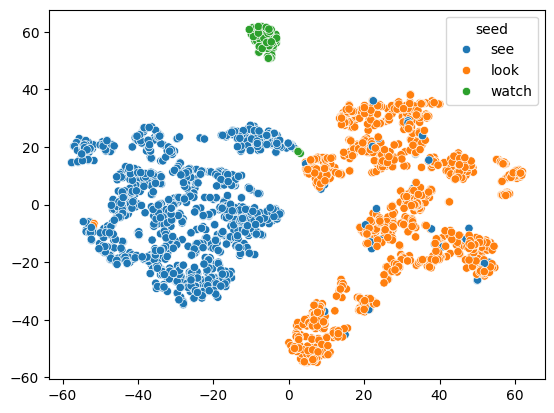

In [55]:
meta = pd.DataFrame(builder)
top_seed = Counter(meta.seed)
sns.scatterplot(x=coo[meta.seed.isin({'see','look','watch'}),0], y=coo[meta.seed.isin({'see','look','watch'}),1], hue=meta[meta.seed.isin({'see','look','watch'})].seed)
plt.savefig('/home/xxxx/Dropbox/Apps/Overleaf/Inferred Lexification (SigTyp 2025)/latex/figures/seed.png')

cash1254


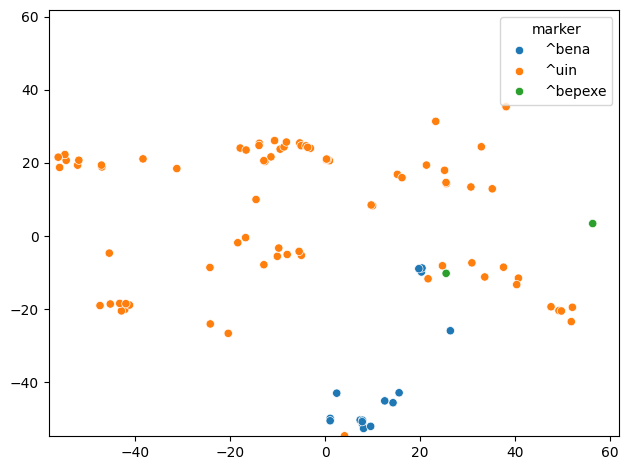

dolg1241


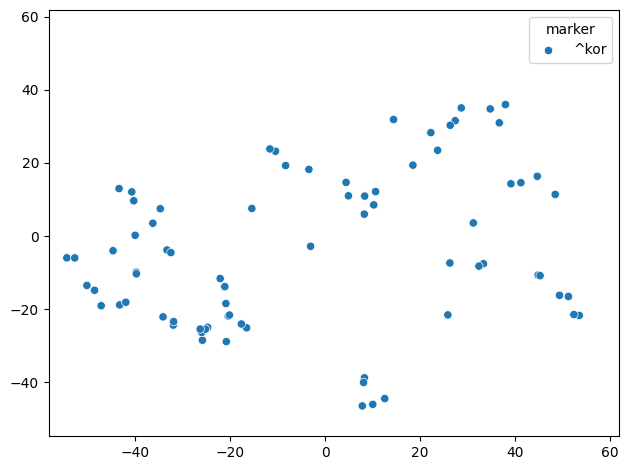

sumi1235


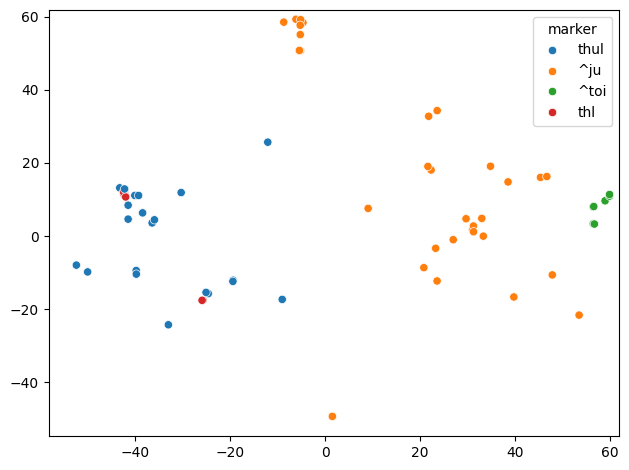

teop1238


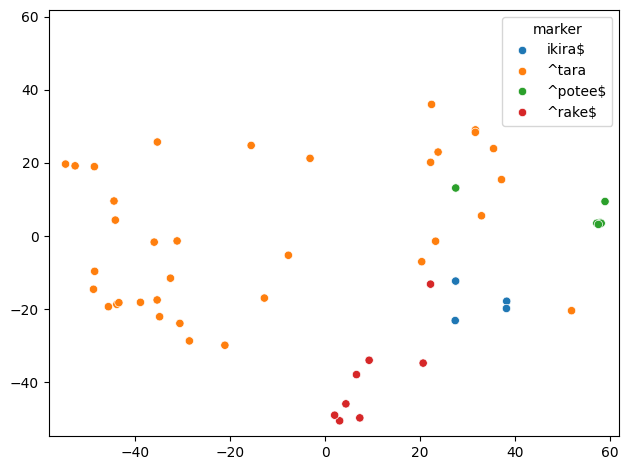

urum1249


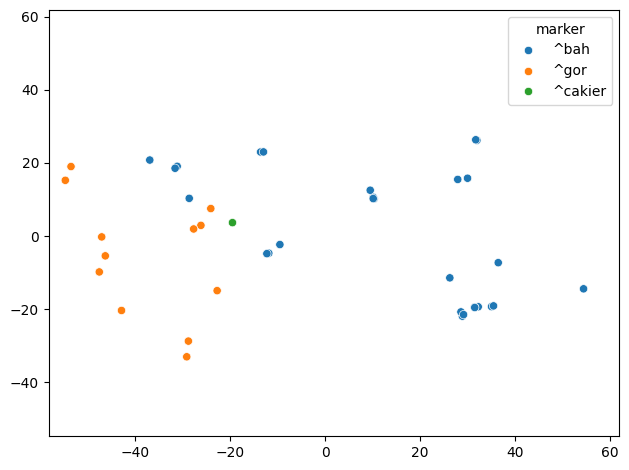

In [63]:
for doc in classifiers: 
    if doc[:4] in {'cash', 'dolg', 'sumi', 'teop','urum'}:
        print(doc)
        sns.scatterplot(x=coo[meta.doculect==doc,0], y=coo[meta.doculect==doc,1], hue=meta[meta.doculect==doc].marker)
        plt.xlim(coo[:,0].min(), coo[:,0].max())
        plt.ylim(coo[:,1].min(), coo[:,1].max())
        plt.savefig('/home/xxxx/Dropbox/Apps/Overleaf/Inferred Lexification (SigTyp 2025)/latex/figures/%s.png' % doc)
        plt.tight_layout()
        plt.show()

In [67]:
meta[meta.marker == '^bena'].line.tolist()

['did not move it was spinning in the same place he was continuously honking he did txaan txaan I saw passing by | In the afternoon he went to look for uricuri at the bank of the lake | He looks for mushrooms there are no mushrooms',
 'It was the one that used to copulate with the anaconda There had come the tapir of the woods | He started to look for his family | Mo he said',
 'there were so many we had never seen so many kinds of animals he showed me | He had gone to look around for jenipapo There the jenipapo was lying | You made your wife and your children become poor ones he said',
 "I ca n't speak Spanish | Ah quick my family is looking for me he said | You didn´t do that what is it they asked",
 'Ah you are like that That´s good | to keep me in it the same My family is looking for me he said | I killed something let´s eat he said',
 'Over there I killed a leptotila he said | The wife his children and his parents - in - law were looking for him | Here not far they killed a snake'

In [68]:
meta[(meta.seed == 'see') & (meta.marker == '^bah')].line.tolist()

['But people who have lived in Tbilisi for many years I ca n’t differ whether they are Georgians or Urum | They see how they dress and they dress also in such a way | Georgians do n’t love working they love food and stuff',
 'Our people came to Tbilisi from Turkey | If you do n’t believe count and see | My father could sing',
 'Where I am from | If you do n’t believe me count and see | If you do n’t believe count and see',
 'If you do n’t believe me count and see | If you do n’t believe count and see | If you do n’t believe count and you will see',
 'If you do n’t believe count and see | If you do n’t believe count and you will see | If you do n’t believe count and see',
 'If you do n’t believe count and you will see | If you do n’t believe count and see | I said I love you',
 'Many of our people speak Armenian too | But you ca n’t see a big difference | Urum women are at home all day',
 'I wonder how these people lived here that ’s why I guess they moved to Greece and Germany | But th